# <center>Exercise 5</center>
## <center>Segmentation II</center>

In this exercise we will be using some methods of feature extraction to aid in the segmentation using unsupervised machine learning, specifically the algorithm k-means. We will be using the image 'cormoran.jpg'.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from colorspacefunctions import rgb2lab76

import texturefilters as tf

https://scikit-learn.org/stable/about.html#citing-scikit-learn 
    
citation

1. Visual analysis of the image

Read and display the image 'cormoran.jpg'. What are the three distinct objects in the image? What characteristic best differentiates them?

<IPython.core.display.Javascript object>


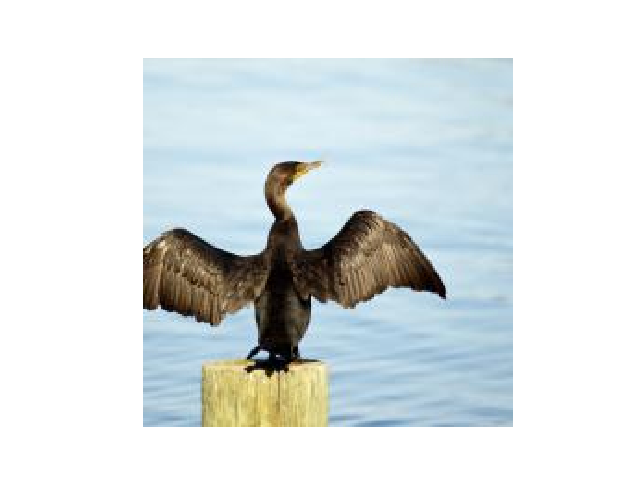

In [2]:
I = cv2.imread('cormoran_rgb.jpg')
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)


%matplotlib notebook
plt.figure(1)
plt.imshow(I)
plt.axis('off')
plt.show()

Turn the image into gray scale and display its histogram? Could you use thresholding to separate the different objects in the image?

<IPython.core.display.Javascript object>


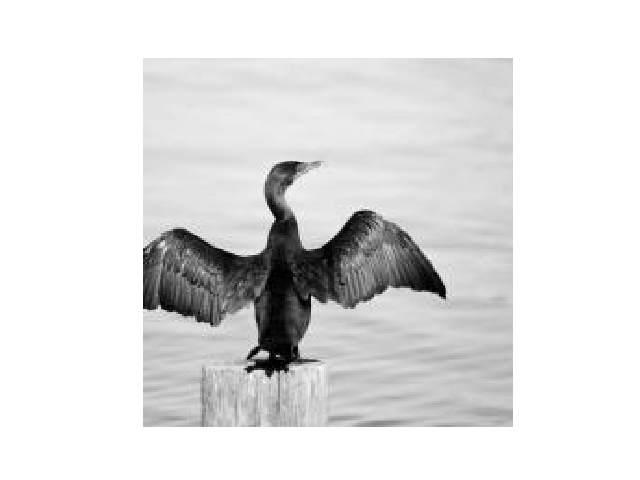

<IPython.core.display.Javascript object>


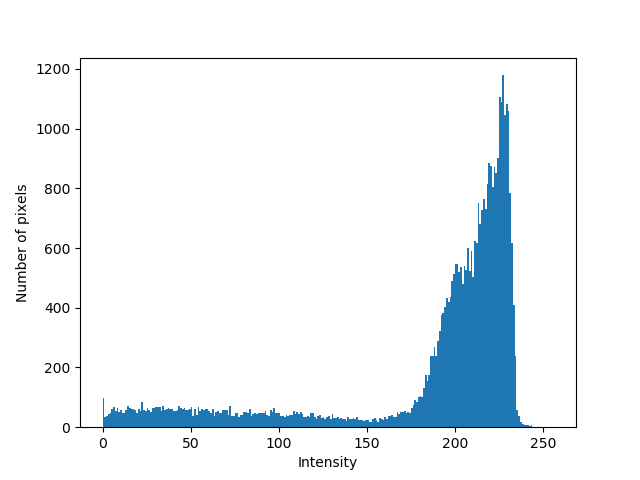

In [3]:
Igray = cv2.imread('cormoran_rgb.jpg', 0)

%matplotlib notebook
plt.figure(2)
plt.imshow(Igray, cmap = 'gray')
plt.axis('off')
plt.show()

plt.figure('Histogram')
plt.hist(Igray.ravel(),256,[0,256]); 
plt.xlabel('Intensity')
plt.ylabel('Number of pixels')
plt.show()

2. RGB characteristics and k-means

In this section we will try to use the different color components of the RGB image as characteristics for segmentation.

- First split the channels of the image

In [4]:
I_R,I_G,I_B = cv2.split(I)

- Turn each channel into a vector of size (nrows*ncols, 1) using the function [np.reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html).

In [5]:
nrows, ncols = I_B.shape

I_B_res = np.reshape(I_B, (nrows*ncols,1))
I_R_res = np.reshape(I_R, (nrows*ncols,1))
I_G_res = np.reshape(I_G, (nrows*ncols,1))
print(I_G_res.shape)

(40000, 1)


- Display in a 3d scatter plot all the data from the 3 vectors, can you see any distict group?

[Here](https://matplotlib.org/3.1.1/gallery/mplot3d/scatter3d.html) is the documentation on 3d scatter plot. 


<IPython.core.display.Javascript object>


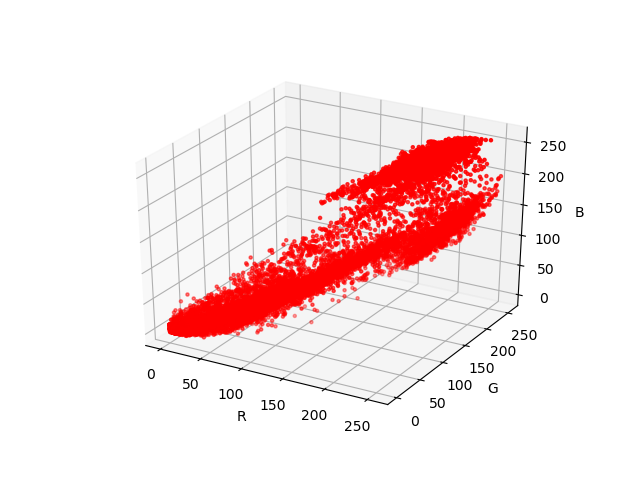

In [6]:
fig = plt.figure('scatter plot')
ax = fig.add_subplot(111, projection='3d')

ax.scatter(I_R_res, I_G_res, I_B_res, c='r', marker='.')

ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')

plt.show()

The space we displayed in the las segment is where we will apply [k-means](https://team.inria.fr/steep/files/2015/03/tp51.pdf). Since we have three objects we will use k = 3, that means we will have 3 randomized centroids.

To implement this algorithm we will be using [Kmeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) from sklearn.cluster, it should be in the cell with the imported libraries. We will be using the method fit_predict which asigns a label to each pixel according to the cluster assigned to them.

Fisrt concatenate the three vectors of the different components, you should get a matriz of size (nrows* ncols, 3). We will be using two commands to make it easier, the code should look like this:

<code>kmeans = KMeans()
prediction = kmeans.fit_predict()
</code>

In KMeans leave every value as its default except the number of clusters. The input for fit_predict should be the matrix with the concatenated vectors.

Now we will display scatter plot from last section adding the centroids in their positions after applying the algorithm. To access the positions of the cluster centers use the method kmeans.cluster_centers, the output of this method is an array with the coordinates of each center. 

<code>First_cluster = kmeans.cluster_centers_[:, 0]
</code>

In the scatter plot, paint the dots representing the centers a different color and make them bigger so they are easier to spot.

(40000, 3)
[[196.33704909 219.53322811 230.63865049]
 [ 60.17733122  46.75286445  32.76590869]
 [177.88023493 162.98033708 113.75229826]]


<IPython.core.display.Javascript object>


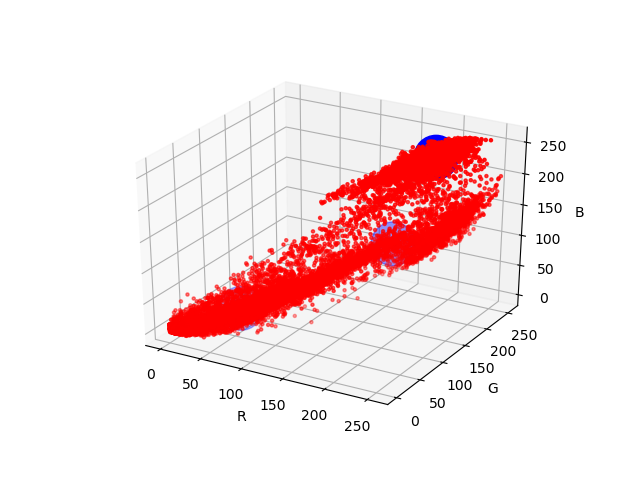

In [7]:
I_res = np.concatenate((I_R_res,I_G_res, I_B_res),axis=1)
print(I_res.shape)


kmeans = KMeans(n_clusters=3)
pred_y = kmeans.fit_predict(I_res)
print(kmeans.cluster_centers_)

fig = plt.figure('scatter plot +kmeans')
ax2 = fig.add_subplot(111, projection='3d')

ax2.scatter(I_R_res, I_G_res, I_B_res, c='r', marker='.')

ax2.set_xlabel('R')
ax2.set_ylabel('G')
ax2.set_zlabel('B')

ax2.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=1000, c='blue')
plt.show()

To see the actual segmentation of the image we will use the method kmeans.labels_, this creates a vectors size (nrows* ncols, 1) with the number of the cluster assigned to each pixel in the image. To display it as an image in false color (as we did in the last exercise with the labeled image) we have to return this vector to the original shape of the image.

Now display this labeled image, no colormap necessary.

(40000,)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


<IPython.core.display.Javascript object>


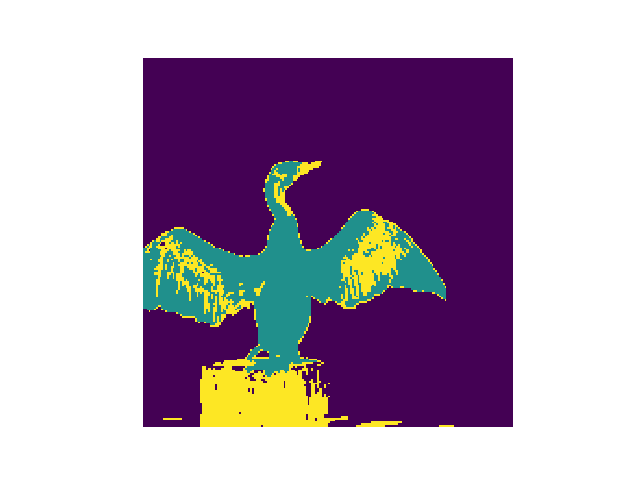

In [8]:
eti =kmeans.labels_
print(eti.shape)

pixel_labels = np.reshape(eti, (nrows, ncols))
print(pixel_labels)

%matplotlib notebook
plt.figure('I labeled')
plt.imshow(pixel_labels)
plt.axis('off')
plt.show()

3. ab chromatic characteristics

In RGB the color information is distributed along the three components, in other color representations this is not the case, the chromatic and achromatic information are separate. For this section we will be using the [Lab](https://www.xrite.com/blog/lab-color-space) space where the L represents the achromatic information (lightnes) and ab the chromatic information. We will be applying kmean over the chromatic components. 

First use the functionrgb2lab76 that comes with the exercise. Now like we did previously with the RGB components split them and reshape the ab components into two vectors of shape (nrows* ncols, 1). Display this two vectors as a 2d scatterplot.

<IPython.core.display.Javascript object>


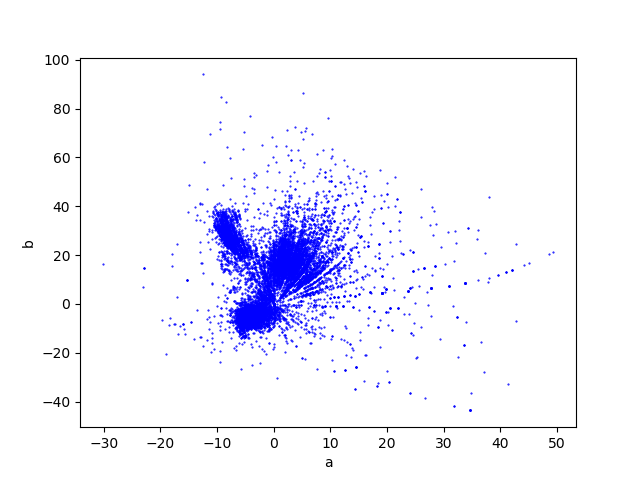

In [9]:
Lab_Im = rgb2lab76(I)
L_l,L_a,L_b = cv2.split(Lab_Im)

L_a_res = np.reshape(L_a, (nrows*ncols,1))
L_b_res = np.reshape(L_b, (nrows*ncols,1))

plt.figure('ab scatter')
plt.scatter(L_a_res, L_b_res, c='blue', s= 1, marker='.')
plt.xlabel('a')
plt.ylabel('b')
plt.show()

Apply kmeans over this new space, display the scatterplot with the new clusters and the segmented image. Can you appreciate any difference between the segmentation in this segement and the segmentation in segment 2? Does any of the components (ab) have more weight in the position of the centroids?

[[-3.634289   -4.50936751]
 [ 3.5136955  15.22148357]
 [-3.61938153 29.75282352]]


<IPython.core.display.Javascript object>


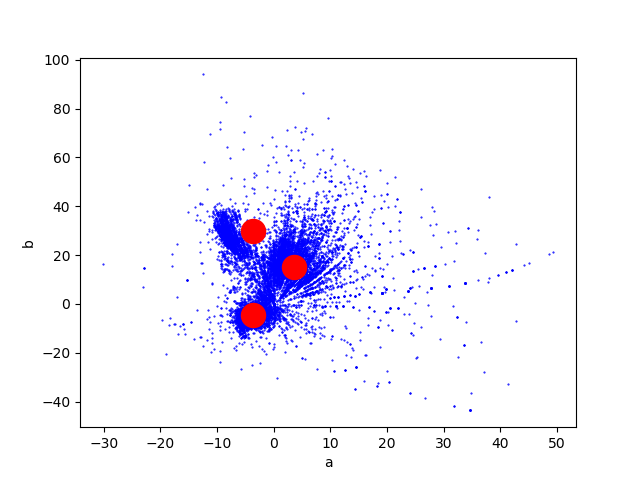

In [10]:
ab_res =np.concatenate((L_a_res, L_b_res), axis=1)


kmeans2 = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans2.fit_predict(ab_res)
print(kmeans2.cluster_centers_)


plt.figure('ab scatter +kmeans')
plt.scatter(L_a_res, L_b_res, c='blue', s= 1, marker='.')
plt.xlabel('a')
plt.ylabel('b')
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], s=300, c='red')
plt.show()

(40000,)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


<IPython.core.display.Javascript object>


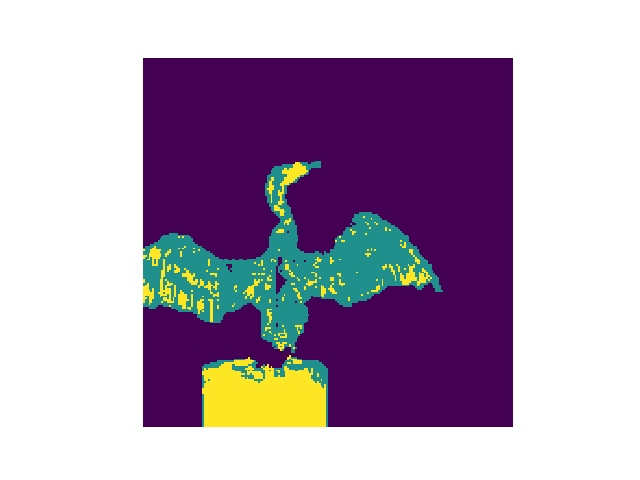

In [11]:
eti_ab =kmeans2.labels_
print(eti_ab.shape)

pixel_labels_ab = np.reshape(eti_ab, (nrows, ncols))
print(pixel_labels_ab)

%matplotlib notebook
plt.figure('ab labeled')
plt.imshow(pixel_labels_ab)
plt.axis('off')
plt.show()

To stop one component from weighting more when calculating the distances beacuse of its wider range we are going to normalize the components. This new matrx will be called ab_norm. Look at the given code and try to understand the process of normalization:

<code>ab_res =np.concatenate((L_a_res, L_b_res), axis=1)

[x, ndim]= ab_res.shape
ab_norm = ab_res
ab_norm = ab_norm.astype(np.float64)
for ind in range (0, ndim):
    datos = ab_res[:,ind]
    datos_norm = (datos- np.mean(datos))/np.std(datos)
    ab_norm[:,ind] = datos_norm   
    
L_a_norm = ab_norm[:, 0]
L_b_norm = ab_norm[:, 1]
</code>

Once you understand the process copy it changing the variable names for your own.
Display the new characteristic vectors in an scatter plot.

<IPython.core.display.Javascript object>


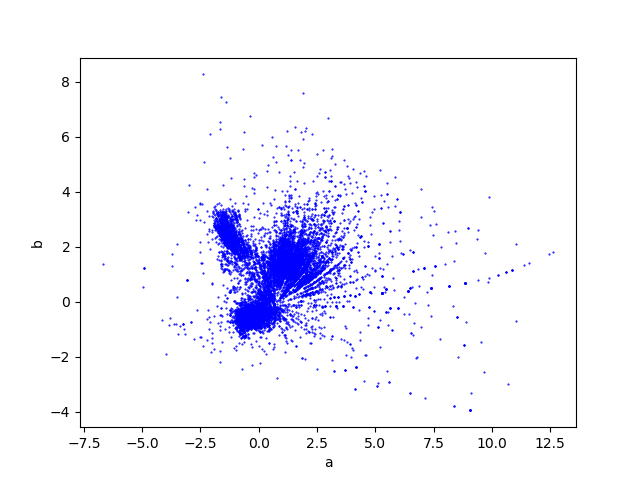

In [12]:
ab_res =np.concatenate((L_a_res, L_b_res), axis=1)

[x, ndim]= ab_res.shape
ab_norm = ab_res
ab_norm = ab_norm.astype(np.float64)
for ind in range (0, ndim):
    datos = ab_res[:,ind]
    datos_norm = (datos- np.mean(datos))/np.std(datos)
    ab_norm[:,ind] = datos_norm
    
L_a_norm = ab_norm[:, 0]
L_b_norm = ab_norm[:, 1]

plt.figure('ab scatter norm')
plt.scatter(L_a_norm, L_b_norm, c='blue', s= 1, marker='.')
plt.xlabel('a')
plt.ylabel('b')
plt.show()

Apply kmeans over this new space y display the labelled image. Can you see any difference between this and the last time we applied kmeans?

[[ 1.79720794  1.43758698]
 [-0.26796365 -0.46384445]
 [-1.13882656  2.33959865]]


<IPython.core.display.Javascript object>


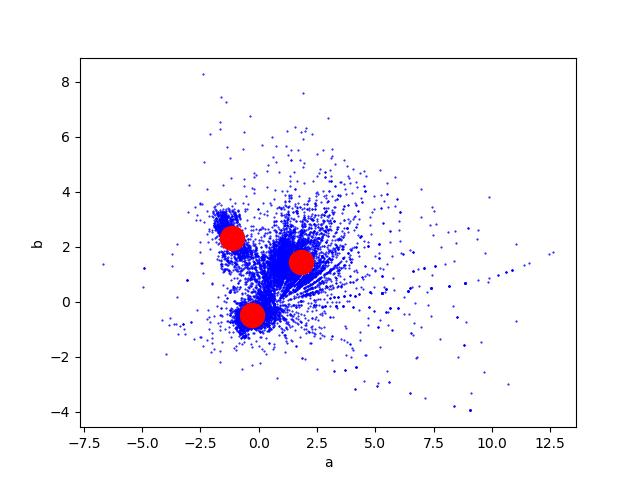

In [13]:
kmeansnorm = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_norm = kmeansnorm.fit_predict(ab_norm)
print(kmeansnorm.cluster_centers_)


plt.figure('ab_norm scatter +kmeans')
plt.scatter(L_a_norm, L_b_norm, c='blue', s= 1, marker='.')
plt.xlabel('a')
plt.ylabel('b')
plt.scatter(kmeansnorm.cluster_centers_[:, 0], kmeansnorm.cluster_centers_[:, 1], s=300, c='red')
plt.show()

(40000,)
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


<IPython.core.display.Javascript object>


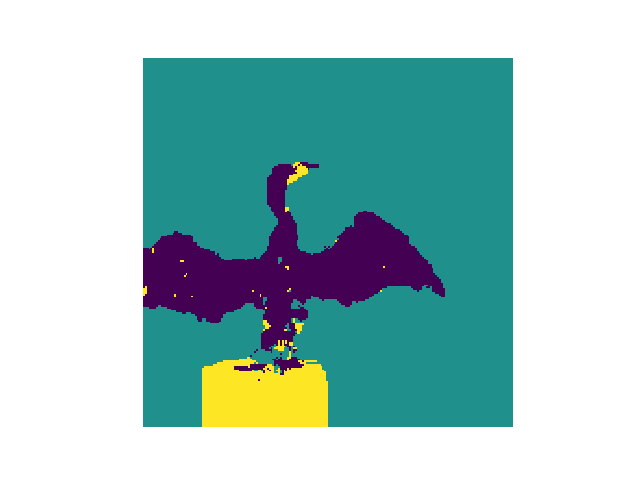

In [14]:
eti_ab_norm =kmeansnorm.labels_
print(eti_ab_norm.shape)

pixel_labels_ab_norm = np.reshape(eti_ab_norm, (nrows, ncols))
print(pixel_labels_ab_norm)

%matplotlib notebook
plt.figure('ab_norm labeled')
plt.imshow(pixel_labels_ab_norm)
plt.axis('off')
plt.show()

**IV. Texture characteristics**

Another set of characteristics that can be used for segmentation are those extracted from the texture of the image, in this exercise we will be using 3 different filters to extract these characteristics.

Texture characterictics are based on standard statistical measures, such as range, standard deviation, and entropy.

The range and standard deviation filters can be found in the file texturefilters that comes with the excercise. We will be using the [entropy filter](https://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.entropy) from scikit-image. 

Filter the gray scale version of the cormoran image with each of the 3 texture filters (stdfilt, entropyfilt and rangefilt) and display the results.

In [29]:
J = tf.stdfilt(Igray)
R = tf.rangefilt(Igray)

from skimage.filters.rank import entropy

E = entropy(Igray, np.ones([7,7]))

<IPython.core.display.Javascript object>


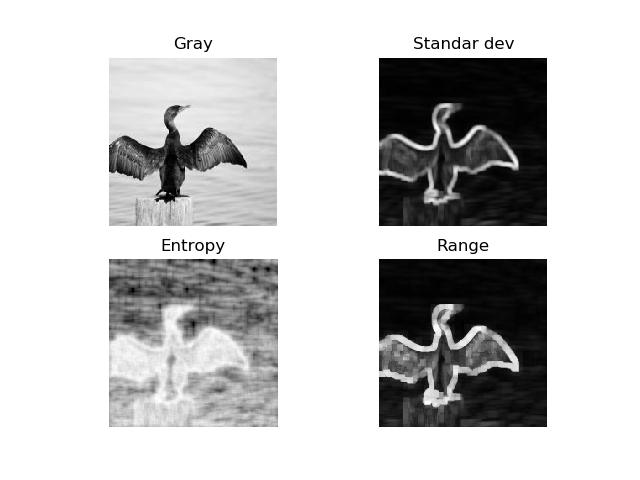

In [30]:
plt.figure('Texture filters')
plt.subplot(2,2,1)
plt.title('Gray')
plt.imshow(Igray, cmap = 'gray')
plt.axis('off')

plt.subplot(2,2,2)
plt.title('Standar dev')
plt.imshow(J, cmap = 'gray', vmin = np.amin(J), vmax =np.amax(J))
plt.axis('off')

plt.subplot(2,2,3)
plt.title('Entropy')
plt.imshow(E, cmap = 'gray', vmin = np.amin(E), vmax =np.amax(E))
plt.axis('off')

plt.subplot(2,2,4)
plt.title('Range')
plt.imshow(R, cmap = 'gray', vmin = np.amin(R), vmax =np.amax(R))
plt.axis('off')

plt.show()

Look at the resulting images. Choose two characteristics for the segmentation and do the segmentation kkep in mind the different space of the characteristics.

<IPython.core.display.Javascript object>


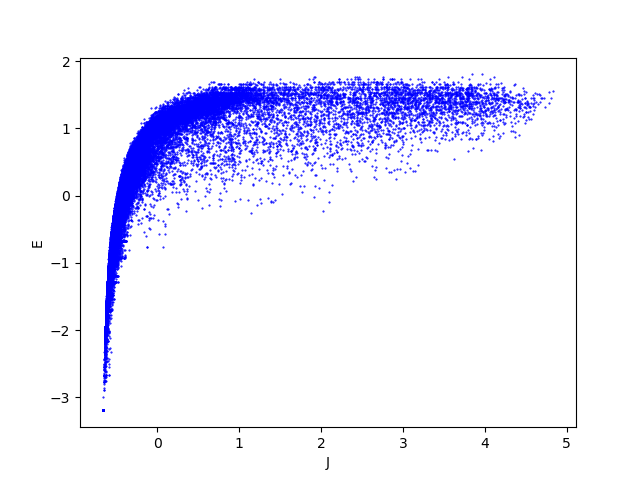

In [31]:
J_res = np.reshape(J, (nrows*ncols,1))
E_res = np.reshape(E, (nrows*ncols,1))

JE_res =np.concatenate((J_res, E_res), axis=1)

[x, ndim]= JE_res.shape
JE_norm = JE_res
JE_norm = JE_norm.astype(np.float64)
for ind in range (0, ndim):
    datos = JE_res[:,ind]
    datos_norm = (datos- np.mean(datos))/np.std(datos)
    JE_norm[:,ind] = datos_norm
    
J_norm = JE_norm[:, 0]
E_norm = JE_norm[:, 1]

plt.figure('JE scatter norm')
plt.scatter(J_norm, E_norm, c='blue', s= 1, marker='.')
plt.xlabel('J')
plt.ylabel('E')
plt.show()

In [32]:
J_res = np.reshape(J_norm, (nrows*ncols,1))
E_res = np.reshape(E_norm, (nrows*ncols,1))

[[-0.54502739 -0.84639179]
 [ 0.06450265  0.7664569 ]
 [ 2.78068165  1.30057286]]


<IPython.core.display.Javascript object>


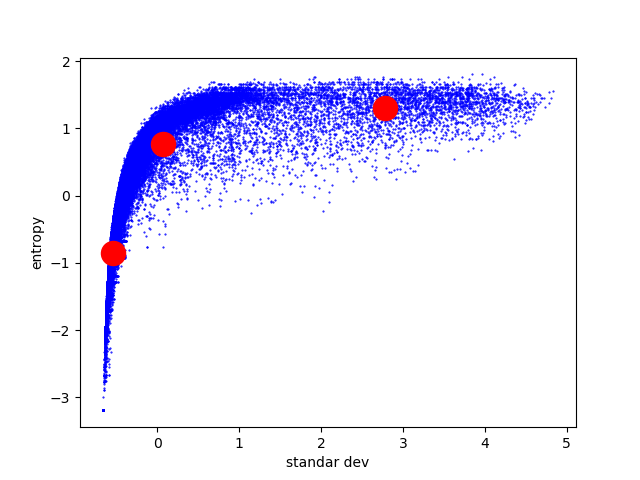

In [33]:
textures_res =np.concatenate((J_res, E_res), axis=1)


kmeans3 = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans3.fit_predict(textures_res)
print(kmeans3.cluster_centers_)


plt.figure('textures scatter + kmeans')
plt.scatter(J_res, E_res, c='blue', s= 1, marker='.')
plt.xlabel('standar dev')
plt.ylabel('entropy')
plt.scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1], s=300, c='red')
plt.show()

(40000,)
[[0 0 0 ... 1 0 0]
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [0 0 1 ... 1 0 0]]


<IPython.core.display.Javascript object>


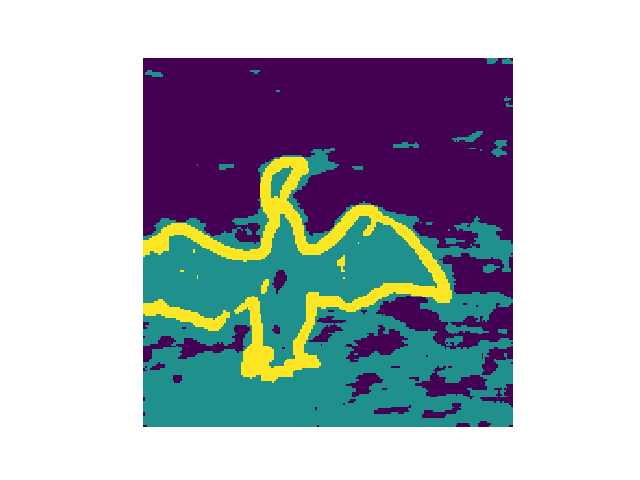

In [34]:
eti_textures =kmeans3.labels_
print(eti_textures.shape)

pixel_labels_textures = np.reshape(eti_textures, (nrows, ncols))
print(pixel_labels_textures)

%matplotlib notebook
plt.figure('textures labeled')
plt.imshow(pixel_labels_textures)
plt.axis('off')
plt.show()

Looking at the results, would you choose these characteristics over the previous ones?

**V. Mixing characteristics of different nature**

To improve the results of the segmentation choose 3 characteristics of different nature (color and texture).

Do the segmentation of the image using kmeans with the three chosen characteristics normalized. 

<IPython.core.display.Javascript object>


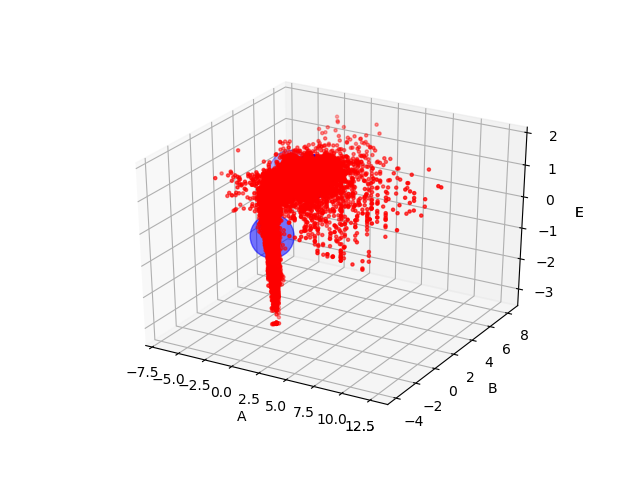

In [50]:
E_norm = np.reshape(E_norm, (nrows*ncols,1))
L_a_norm = np.reshape(L_a_norm, (nrows*ncols,1))
L_b_norm = np.reshape(L_b_norm, (nrows*ncols,1))
ABE_res = np.concatenate((L_a_norm, L_b_norm, E_norm),axis=1)

fig = plt.figure('scatter plot ABE')
ax3 = fig.add_subplot(111, projection='3d')

ax3.scatter(L_a_norm, L_b_norm, E_res, c='r', marker='.')

ax3.set_xlabel('A')
ax3.set_ylabel('B')
ax3.set_zlabel('E')

plt.show()

[[ 1.68798133  1.3302558   1.26816207]
 [-0.28326875 -0.47916334 -0.36289779]
 [-1.12614625  2.30333749  1.02511133]]


<IPython.core.display.Javascript object>


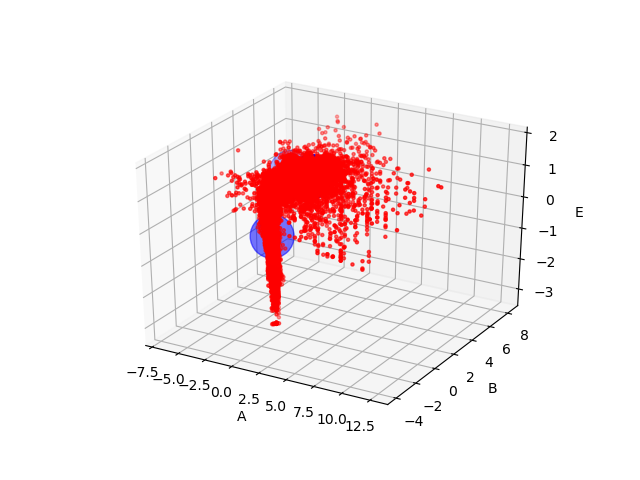

In [53]:
kmeansabe = KMeans(n_clusters=3)
pred_y = kmeansabe.fit_predict(ABE_res)
print(kmeansabe.cluster_centers_)

figabe = plt.figure('abe')
axabe = figabe.add_subplot(111, projection='3d')

axabe.scatter(L_a_norm, L_b_norm, E_res, c='r', marker='.')

axabe.set_xlabel('A')
axabe.set_ylabel('B')
axabe.set_zlabel('E')

axabe.scatter(kmeansabe.cluster_centers_[:, 0], kmeansabe.cluster_centers_[:, 1], kmeansabe.cluster_centers_[:, 2], s=1000, c='blue')
plt.show()

(40000,)
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


<IPython.core.display.Javascript object>


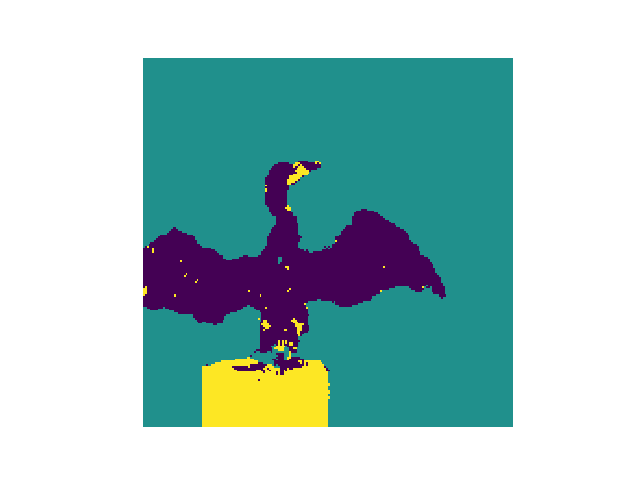

In [55]:
etiabe =kmeansabe.labels_
print(etiabe.shape)

pixel_labelsabe = np.reshape(etiabe, (nrows, ncols))
print(pixel_labelsabe)

%matplotlib notebook
plt.figure('Final')
plt.imshow(pixel_labelsabe)
plt.axis('off')
plt.show()

Looking at the results, which kind of characteristic weighs more on the segmentation of this image?

You can see some over segmentation in some small regions. To solve this problem one alternative is to go to each small region and fuse them with bigger neighboring regions. The solution we will try on this exercise is to process the color components. apply a softening filter over the color components an drepeat the segmentation with kmeans.